In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-prediction1/winequality.csv


In [2]:
df=pd.read_csv("/kaggle/input/wine-quality-prediction1/winequality.csv")

In [3]:
from IPython.display import display, HTML

# Embedding HTML with an image
display(HTML("""
<center>
<iframe src="https://giphy.com/embed/pzGIuR1UeI2oFhyqP1" width="480" height="480" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/wine-papercraft-wino-pzGIuR1UeI2oFhyqP1">via GIPHY</a></p>
</center>
"""))


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

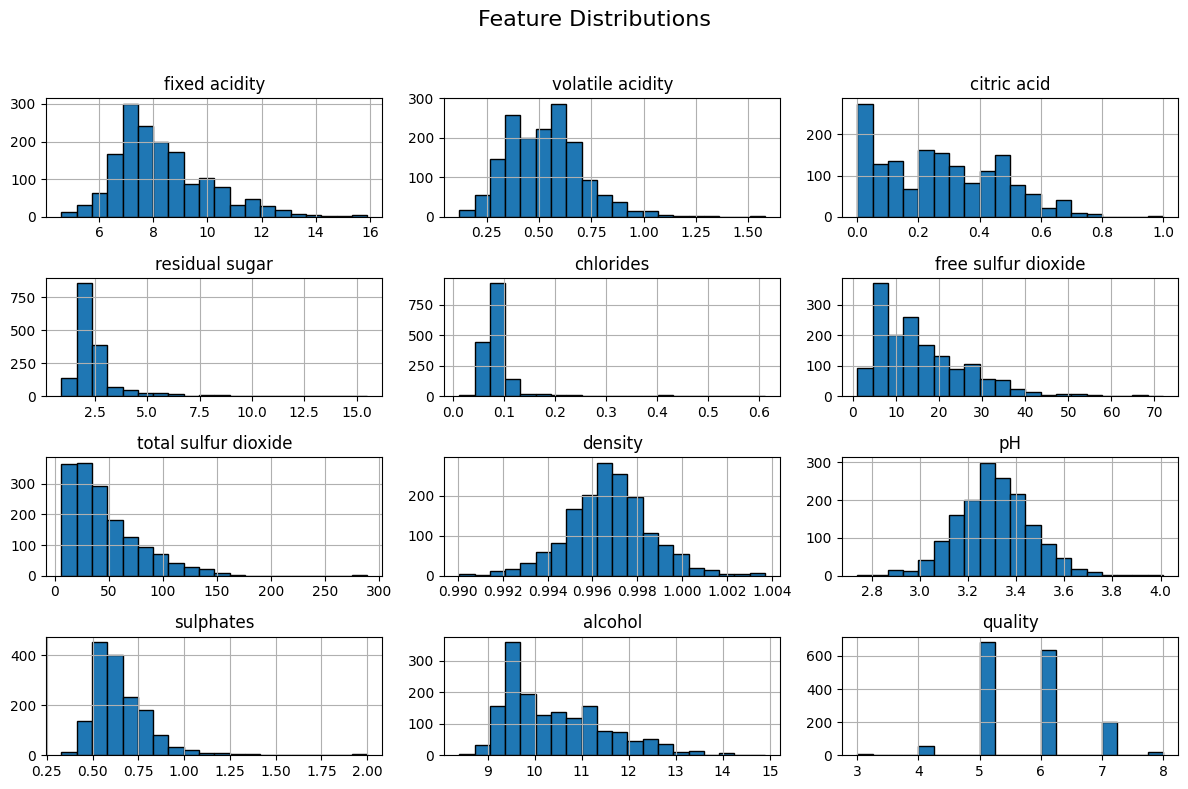

In [10]:
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8), layout=(4, 3), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


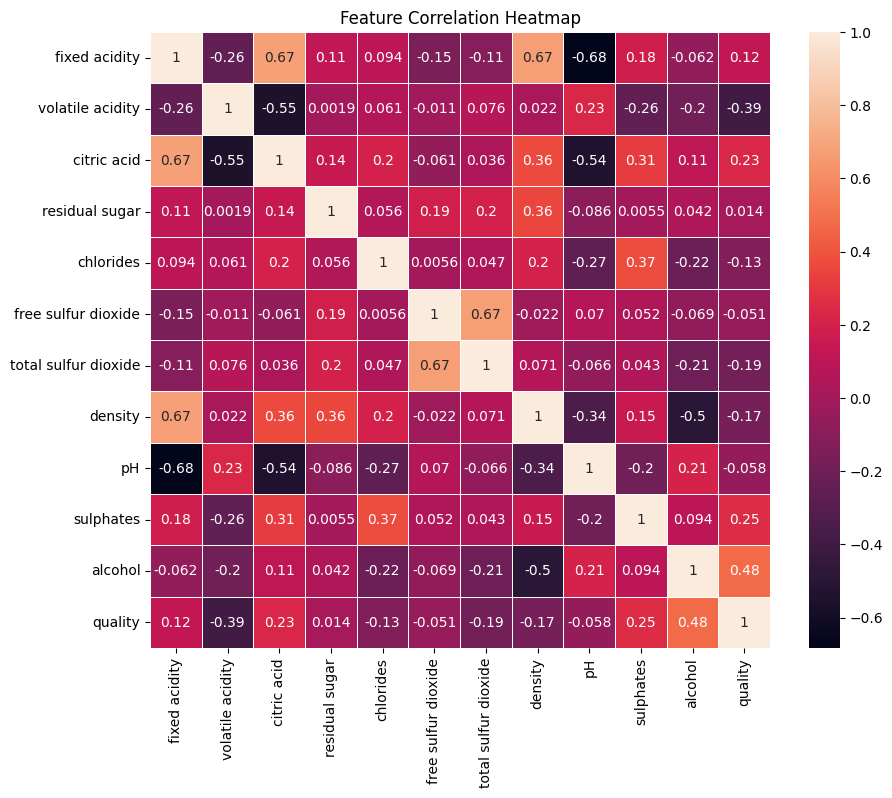

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
correlation_with_target = df.corr()["quality"].sort_values(ascending=False)
correlation_with_target

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [13]:
X = df.drop(columns=["quality"])
y=df['quality']

In [14]:
# standardization

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

columns_to_scale = ["free sulfur dioxide", "total sulfur dioxide", "alcohol"]

ct = ColumnTransformer(
    transformers=[("scaler", StandardScaler(), columns_to_scale)],
    remainder="passthrough"
)

X_scaled = ct.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale + [col for col in X.columns if col not in columns_to_scale])

X_scaled_df.head()


,free sulfur dioxide,total sulfur dioxide,alcohol,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates
0,-0.466193,-0.379133,-0.960246,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56
1,0.872638,0.624363,-0.584777,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68
2,-0.083669,0.229047,-0.584777,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65
3,0.107592,0.411500,-0.584777,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58
4,-0.466193,-0.379133,-0.960246,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56


In [15]:
X_scaled_df.describe()

,free sulfur dioxide,total sulfur dioxide,alcohol,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates
count,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,-6.221137e-17,3.554936e-17,-1.599721e-15,8.319637,0.527821,0.270976,2.538806,0.087467,0.996747,3.311113,0.658149
std,1.000313e+00,1.000313e+00,1.000313e+00,1.741096,0.179060,0.194801,1.409928,0.047065,0.001887,0.154386,0.169507
min,-1.422500e+00,-1.230584e+00,-1.898919e+00,4.600000,0.120000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000
25%,-8.487156e-01,-7.440403e-01,-8.663789e-01,7.100000,0.390000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000
50%,-1.793002e-01,-2.574968e-01,-2.093081e-01,7.900000,0.520000,0.260000,2.200000,0.079000,0.996750,3.310000,0.620000
75%,4.901152e-01,4.723184e-01,6.354971e-01,9.200000,0.640000,0.420000,2.600000,0.090000,0.997835,3.400000,0.730000
max,5.367284e+00,7.375154e+00,4.202453e+00,15.900000,1.580000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.65625

In [18]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled)

0.6875